# Exploratory data analysis

## Setup

In [1]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)

Windows-10-10.0.19045-SP0
Python 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]


In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('../data/final/train.csv')
test = pd.read_csv('../data/final/test.csv')

train.sample(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenditure,CabinNum,GroupSize,FamilySize,HomePlanet,CryoSleep,Destination,VIP,NoSpending,CabinDeck,CabinSide,Solo,Transported
5240,17.0,0.000000,6.714171,0.000000,7.063904,2.708050,7.603898,1163.0,1.0,9.0,Earth,False,TRAPPIST-1e,False,False,F,P,True,False
4968,31.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,181.0,2.0,5.0,Europa,True,55 Cancri e,False,True,B,P,False,True
6311,11.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1387.0,4.0,5.0,Mars,True,TRAPPIST-1e,False,True,F,P,False,True
4940,20.0,0.000000,5.673323,0.000000,7.532088,5.384495,7.772332,64.0,2.0,6.0,Europa,False,55 Cancri e,False,False,A,S,False,False
3533,25.0,6.253829,0.000000,5.652489,0.000000,0.000000,6.689599,127.0,1.0,5.0,Mars,False,TRAPPIST-1e,False,False,D,P,True,False


In [4]:
train.isna().sum().sum()

0

In [5]:
TARGET = 'Transported'
FEATURES = [col for col in train.columns if col not in [TARGET]]

numerical = train[FEATURES].select_dtypes(include=np.number).columns
categorical = train[FEATURES].select_dtypes(exclude=np.number).columns

print(f'Target: {TARGET}')
print(f'Features:\n\tnumerical: {numerical.to_list()}\n\tcategorical:{categorical.to_list()}')
print(f'Shapes:\n\ttrain: {train.shape}\n\ttest: {test.shape}')

Target: Transported
Features:
	numerical: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure', 'CabinNum', 'GroupSize', 'FamilySize']
	categorical:['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'NoSpending', 'CabinDeck', 'CabinSide', 'Solo']
Shapes:
	train: (8693, 19)
	test: (4277, 18)


In [6]:
os.makedirs('figures/eda_2', exist_ok=True)
plt.rcParams["figure.figsize"] = (1.618* 5, 5)
sns.set_style('darkgrid')
sns.set_palette('muted')

## Response marginal analysis

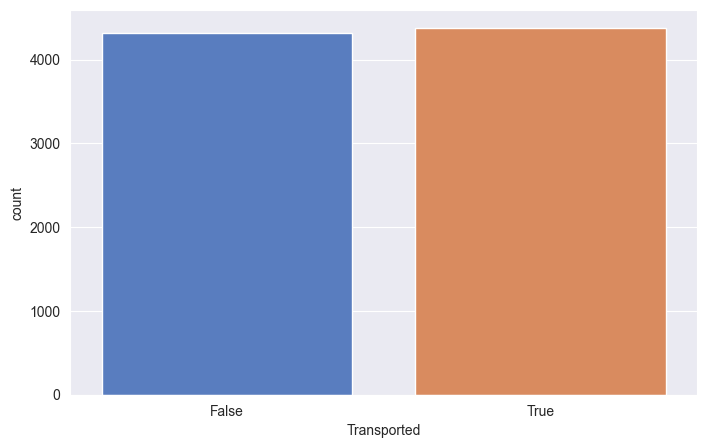

In [7]:
sns.countplot(x=TARGET, data=train)
plt.savefig('./figures/eda_2/response_marginal.png')

## Features marginal analysis

### Categorical features

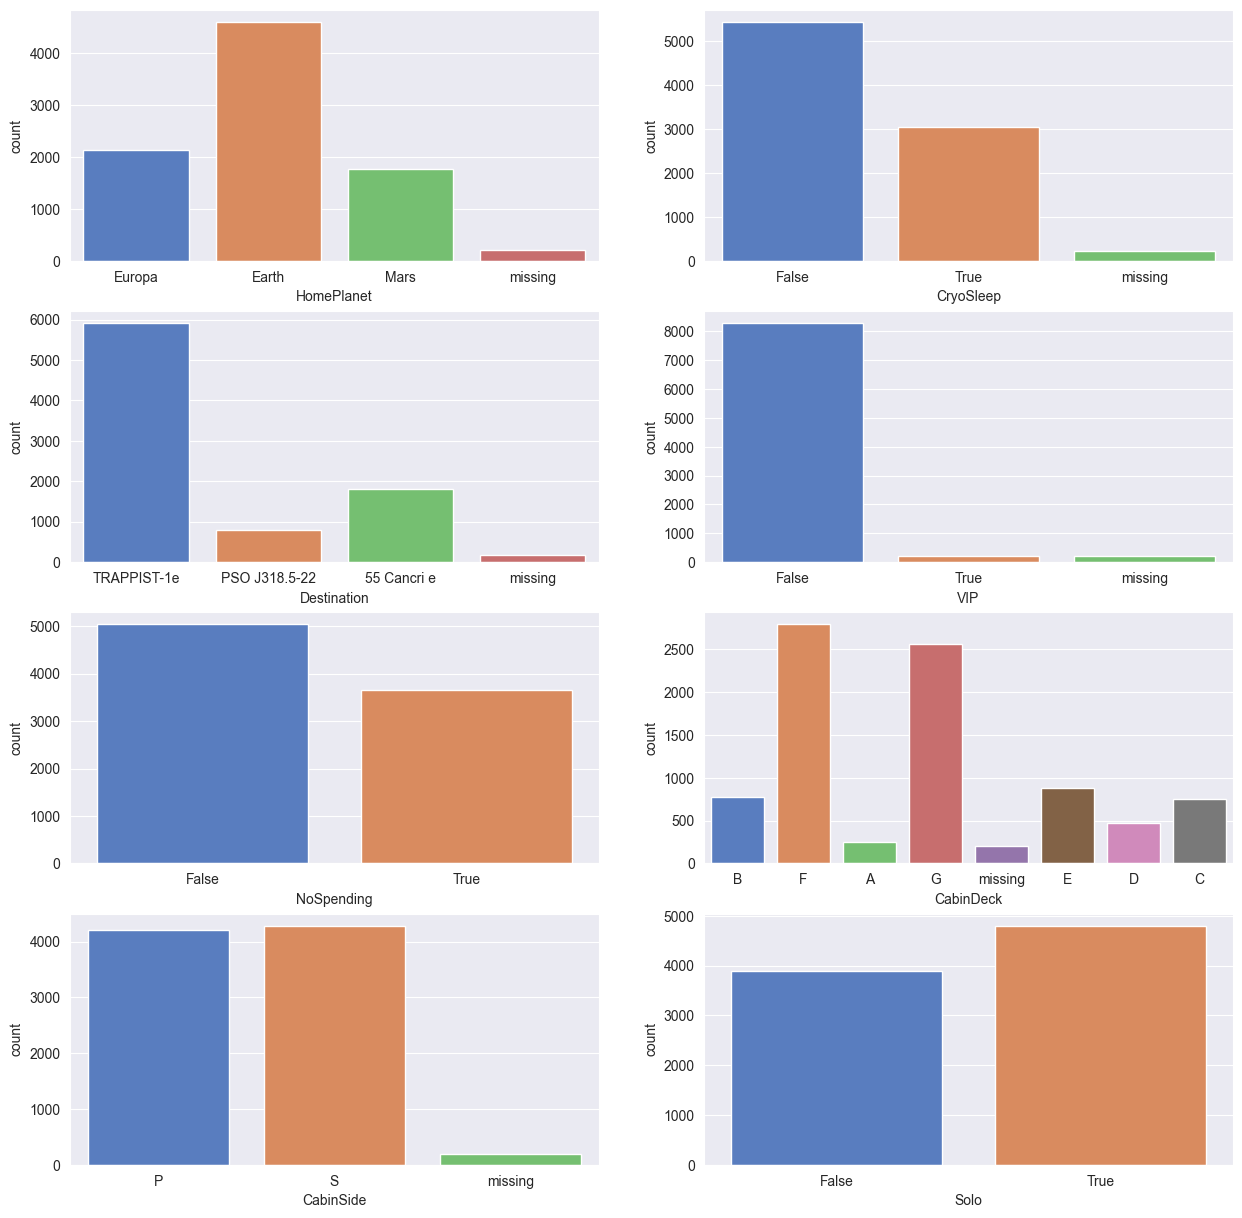

In [8]:
# countplot of categorical features
fig, axs = plt.subplots(4, 2, figsize = (15, 15))
for c, ax in zip(categorical, axs.flatten()):
    sns.countplot(x=c, data=train, ax=ax)
plt.savefig('./figures/eda_2/categorical_marginal.png')

### Numerical features

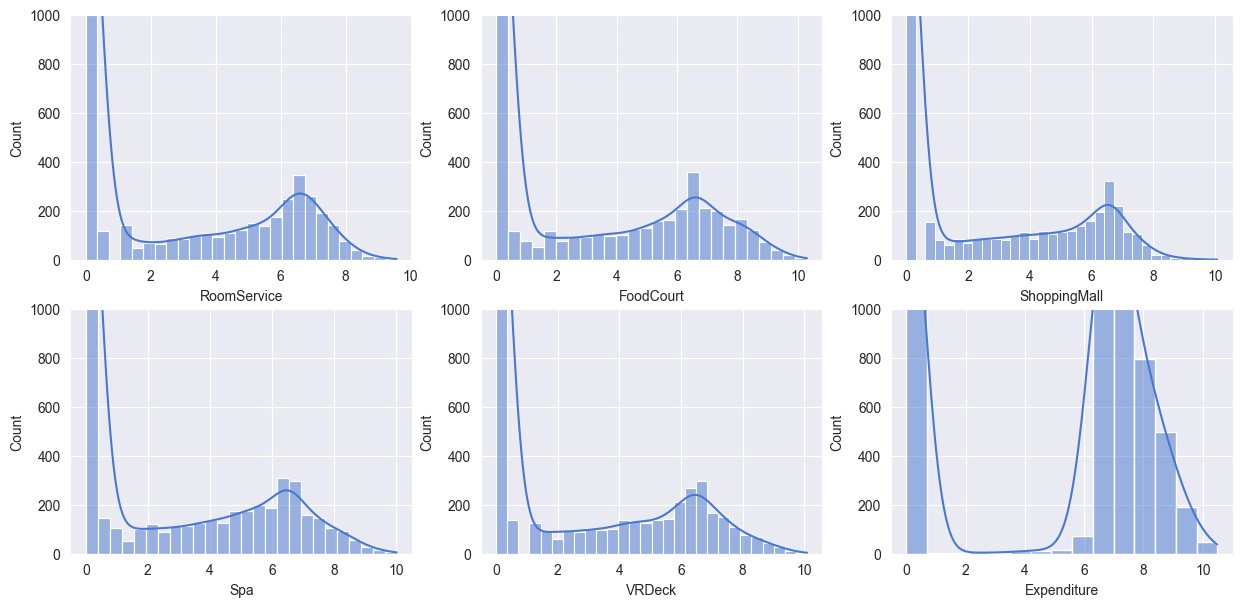

In [9]:
# distribution of expenditure features
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure']
fig, axs = plt.subplots(2, 3, figsize = (15, 7))
for ax, c in zip(axs.flatten(), exp_feats):
    sns.histplot(x=c, data=train, kde=True, ax=ax).set(ylim=[0, 1000])
plt.savefig('./figures/eda_2/numerical_marginal_1.png')

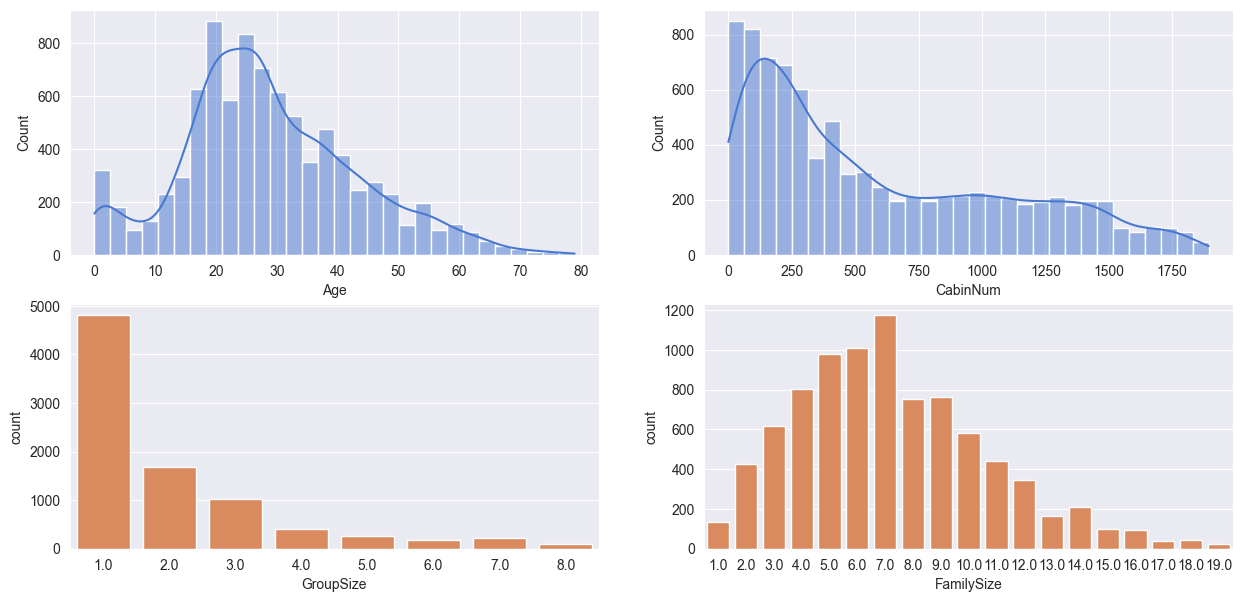

In [10]:
# distribution of other numerical
other_feats = ['Age', 'CabinNum', 'GroupSize', 'FamilySize']
fig, axs = plt.subplots(2, 2, figsize = (15, 7))

sns.histplot(x='Age', data=train, bins=30, kde=True, ax=axs.flatten()[0])
sns.histplot(x='CabinNum', data=train, bins=30, kde=True, ax=axs.flatten()[1])
sns.countplot(x='GroupSize', data=train, ax=axs.flatten()[2], color='C1')
sns.countplot(x='FamilySize', data=train, ax=axs.flatten()[3], color='C1')

plt.savefig('./figures/eda_2/numerical_marginal_2.png')

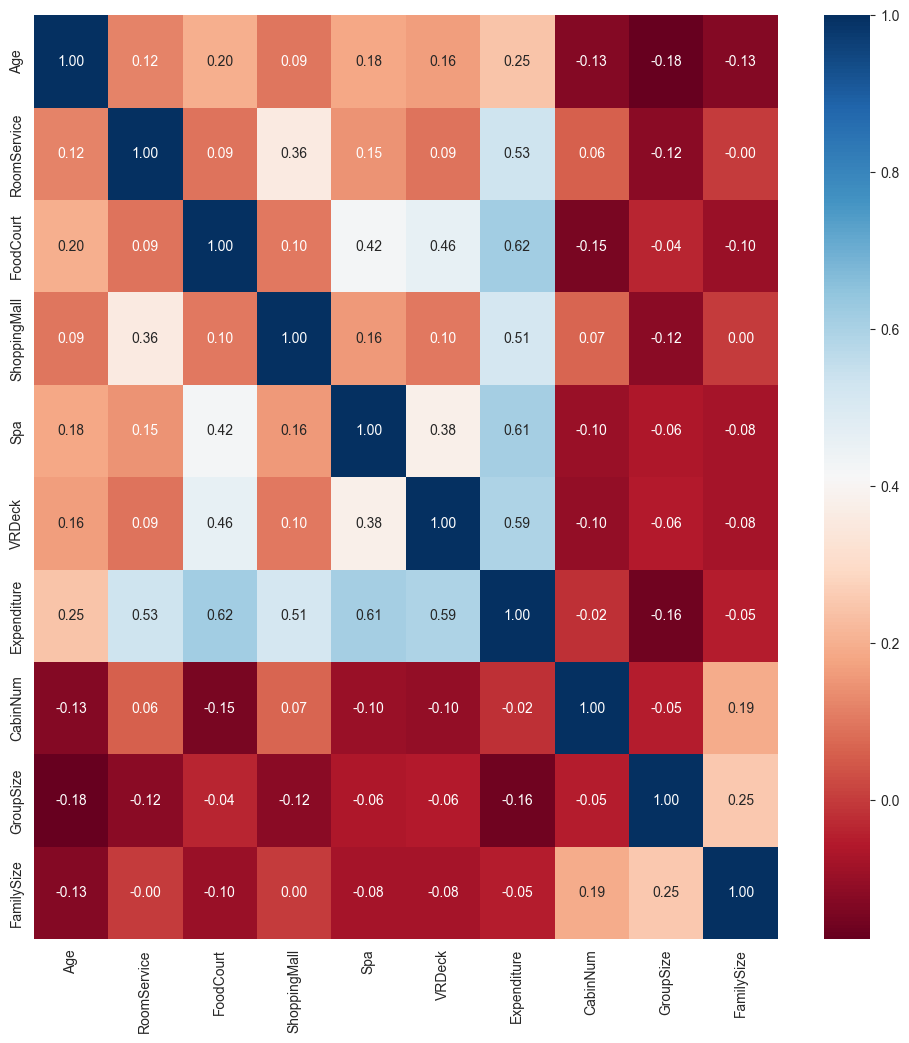

In [11]:
# correlation between numerical variables
fig = plt.figure(figsize=(12, 12))     
sns.heatmap(train[numerical].corr(), annot=True, fmt = ".2f", cmap = "RdBu")
plt.savefig('./figures/eda_2/numerical_corrmap.png')

## Bivariate analysis

In [12]:
# correlation with response
c = pd.DataFrame()
c['corr'] = train.corrwith(train[TARGET])
c['R2'] = c['corr']**2
c.sort_values(by='R2', ascending=False)

C:\Users\alepi\AppData\Local\Temp\ipykernel_4964\1872065226.py:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c['corr'] = train.corrwith(train[TARGET])


,corr,R2
Transported,1.000000,1.000000
NoSpending,0.481628,0.231966
Expenditure,-0.468941,0.219905
Spa,-0.361903,0.130974
RoomService,-0.356220,0.126892
VRDeck,-0.338688,0.114709
ShoppingMall,-0.178536,0.031875
FoodCourt,-0.135029,0.018233
Solo,-0.113792,0.012949
GroupSize,0.082644,0.006830


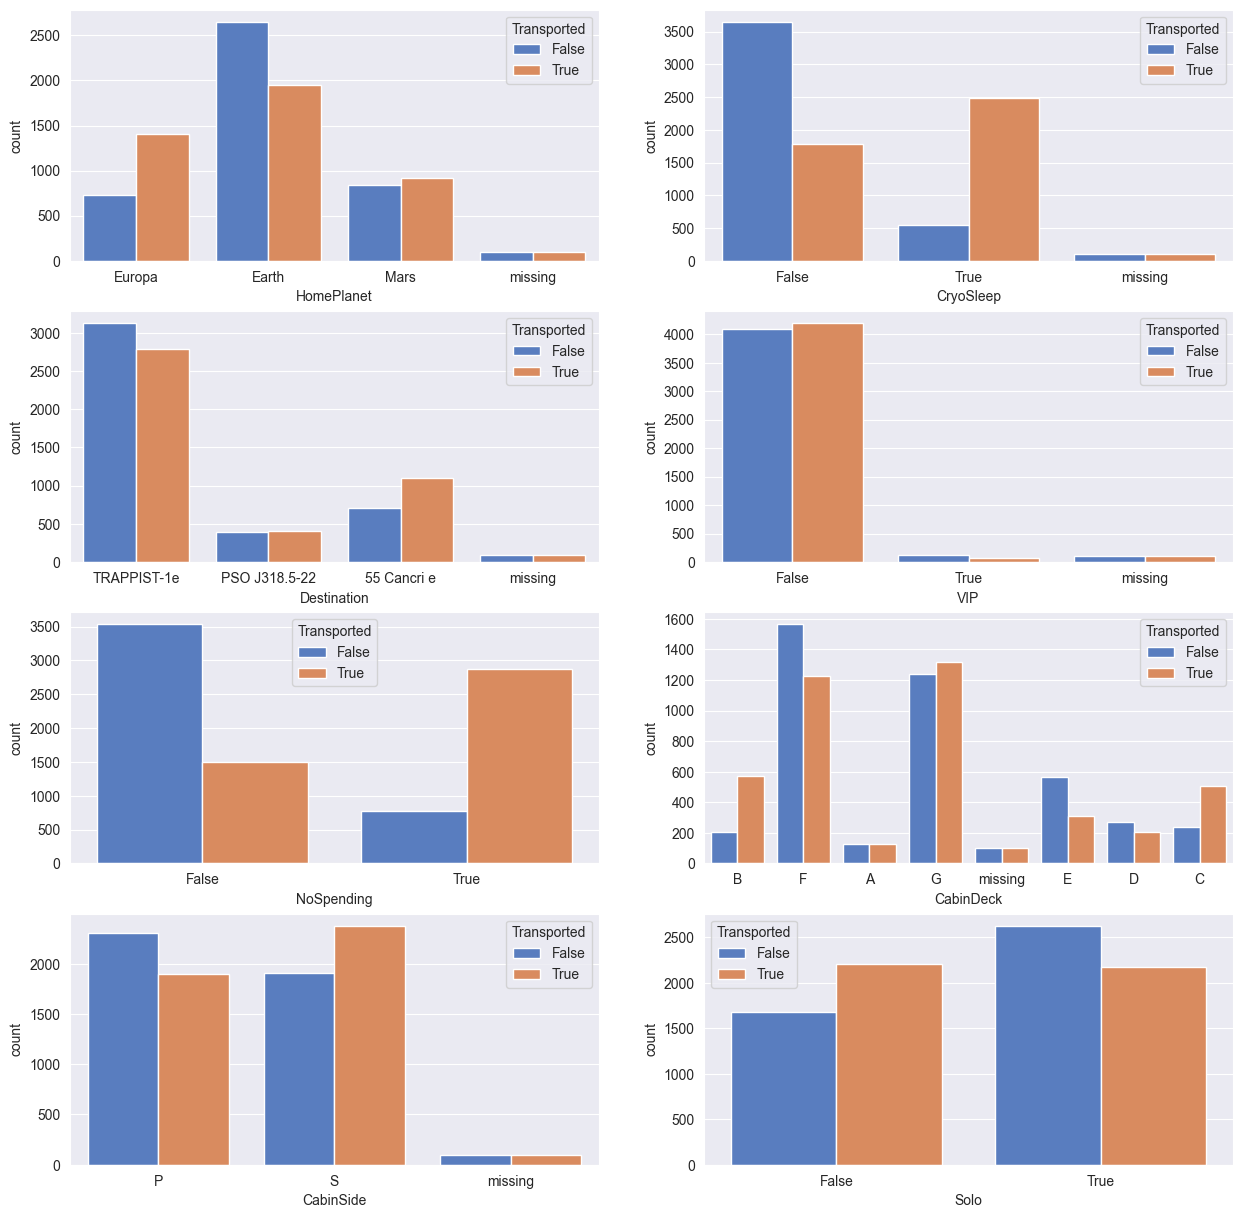

In [13]:
# countplot of categorical features by response value
fig, axs = plt.subplots(4, 2, figsize = (15, 15))
for ax, c in zip(axs.flatten(), categorical):
    sns.countplot(x=c, hue=TARGET, data=train, ax=ax)
plt.savefig('./figures/eda_2/categorical_bivariate.png')

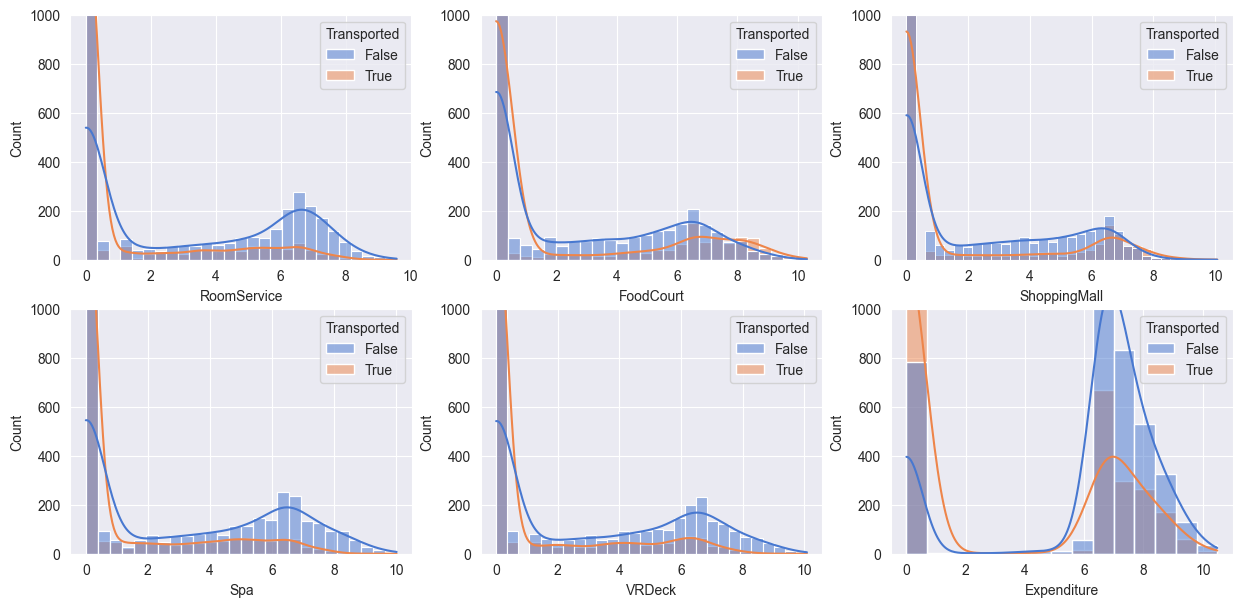

In [14]:
# distribution of expenditure features
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure']
fig, axs = plt.subplots(2, 3, figsize = (15, 7))
for ax, c in zip(axs.flatten(), exp_feats):
    sns.histplot(x=c, data=train, kde=True, hue=TARGET, ax=ax).set(ylim=[0, 1000])
plt.savefig('./figures/eda_2/numerical_bivariate_1.png')

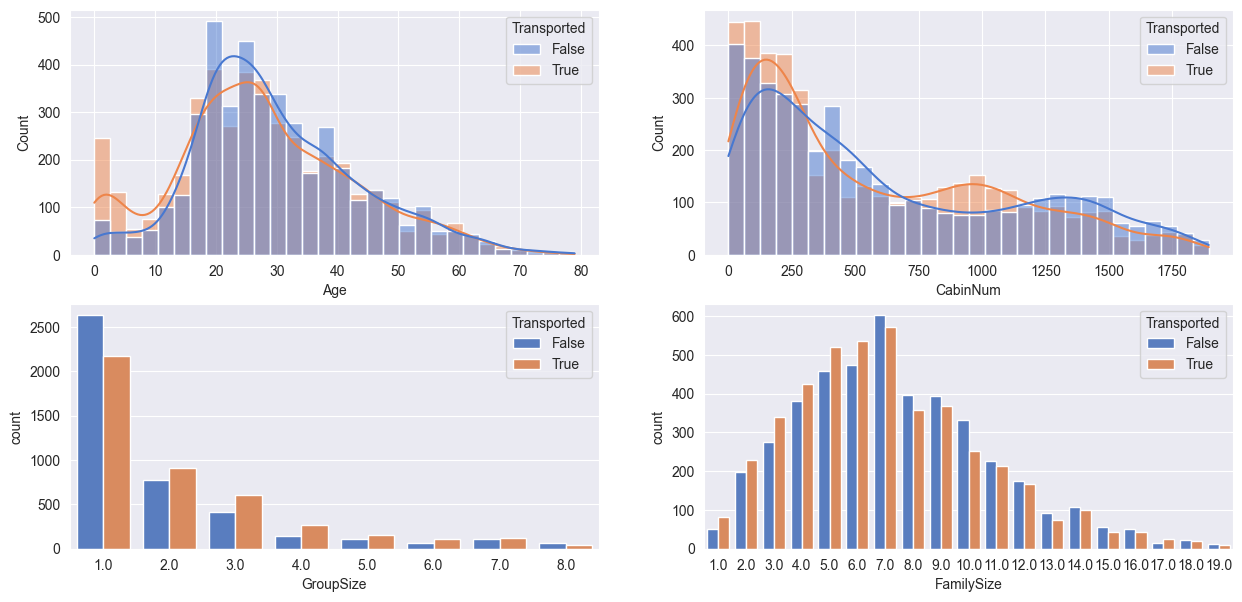

In [15]:
# distribution of other numerical
other_feats = ['Age', 'CabinNum', 'GroupSize', 'FamilySize']
fig, axs = plt.subplots(2, 2, figsize = (15, 7))

sns.histplot(x='Age', data=train, bins=30, kde=True, hue=TARGET, ax=axs.flatten()[0])
sns.histplot(x='CabinNum', data=train, bins=30, kde=True, hue=TARGET, ax=axs.flatten()[1])
sns.countplot(x='GroupSize', data=train, hue=TARGET, ax=axs.flatten()[2])
sns.countplot(x='FamilySize', data=train, hue=TARGET, ax=axs.flatten()[3])

plt.savefig('./figures/eda_2/numerical_bivariate_2.png')